In [521]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [522]:
import os
os.chdir('C:/Users/Kamar/Videos/ML_datasets/Topic_modelling')

In [523]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import gensim
from gensim import corpora
# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models

In [524]:
# disable chained assignments
pd.options.mode.chained_assignment = None

In [525]:
dat= pd.read_csv('data.csv')
dat.head()

,Name,Comment
0,Stephen Oshoke Enike-Matthew,It was a rescue mission! Nigerian government t...
1,Foluso Onifade,If only we can get someone to help us delete t...
2,Fe Bamiduro,This old man should shot up jare...maybe suffe...
3,Joseph Jibueze,So Buhari understands what Constitutional orde...
4,Chioma Ezeja Esther,For where? We the Nigerians are pleading with...


In [526]:
#check the missing value
dat.isnull().sum()

Name        0
Comment    10
dtype: int64

In [527]:
#drop the missing value
df= dat.dropna()

In [528]:
# check missing value
df.isnull().sum()

Name       0
Comment    0
dtype: int64

In [529]:
# Print out the first rows of papers
df.head()

,Name,Comment
0,Stephen Oshoke Enike-Matthew,It was a rescue mission! Nigerian government t...
1,Foluso Onifade,If only we can get someone to help us delete t...
2,Fe Bamiduro,This old man should shot up jare...maybe suffe...
3,Joseph Jibueze,So Buhari understands what Constitutional orde...
4,Chioma Ezeja Esther,For where? We the Nigerians are pleading with...


In [530]:
df.shape

(917, 2)

In [531]:
# Import libraries
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [532]:
# Lower casing and removing punctuations
df['Comment'] = df['Comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Comment'] = df['Comment'].str.replace('[^\w\s]','')
df.Comment.head(5)

C:\Users\Kamar\AppData\Local\Temp/ipykernel_20072/1060847158.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Comment'] = df['Comment'].str.replace('[^\w\s]','')


0    it was a rescue mission nigerian government th...
1    if only we can get someone to help us delete t...
2    this old man should shot up jaremaybe sufferin...
3    so buhari understands what constitutional orde...
4    for where we the nigerians are pleading with o...
Name: Comment, dtype: object

In [533]:
# Removal of stop words
stop = stopwords.words('english')
df['Comment'] = df['Comment'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
df.Comment.head(5)

0    rescue mission nigerian government regard cons...
1    get someone help us delete administration nige...
2    old man shot jaremaybe suffering hunger nigeri...
3    buhari understands constitutional order merit ...
4    nigerians pleading galant solders something na...
Name: Comment, dtype: object

In [534]:
# Lemmatization
df['Comment'] = df['Comment'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Comment.head(5)

0    rescue mission nigerian government regard cons...
1    get someone help u delete administration niger...
2    old man shot jaremaybe suffering hunger nigeri...
3    buhari understands constitutional order merit ...
4    nigerian pleading galant solder something natu...
Name: Comment, dtype: object

In [535]:
# Import the wordcloud library
from wordcloud import WordCloud

In [536]:
# Join the different processed comments together.
long_string = ','.join(list(df['Comment'].values))

In [537]:
wordcloud = WordCloud(background_color='white').generate(long_string)

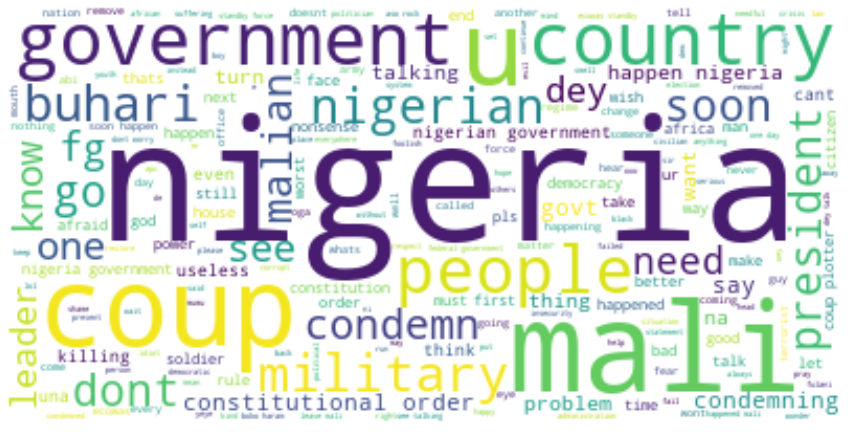

In [538]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [539]:
#dection of sentiment in the text
#import libraries
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kamar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [540]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
#Sentiment Analysis
SIA = SentimentIntensityAnalyzer()
df["Comment"]= df["Comment"].astype(str)
# Applying Model, Variable Creation
df[['Compound']]=df["Comment"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Positive Score']=df["Comment"].apply(lambda x:SIA.polarity_scores(x)['pos'])
df['Negative Score']=df["Comment"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Neutral Score']=df["Comment"].apply(lambda x:SIA.polarity_scores(x)['neu'])
# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment']=''
df.loc[df['Compound']>0,'Sentiment']='Positive'
df.loc[df['Compound']==0,'Sentiment']='Neutral'
df.loc[df['Compound']<0,'Sentiment']='Negative'

In [541]:
df.head(5)

,Name,Comment,Compound,Positive Score,Negative Score,Neutral Score,Sentiment
0,Stephen Oshoke Enike-Matthew,rescue mission nigerian government regard cons...,0.5106,0.248,0.000,0.752,Positive
1,Foluso Onifade,get someone help u delete administration niger...,0.8442,0.467,0.120,0.412,Positive
2,Fe Bamiduro,old man shot jaremaybe suffering hunger nigeri...,-0.6249,0.000,0.298,0.702,Negative
3,Joseph Jibueze,buhari understands constitutional order merit ...,0.4215,0.259,0.000,0.741,Positive
4,Chioma Ezeja Esther,nigerian pleading galant solder something natu...,0.9128,0.442,0.000,0.558,Positive


In [542]:
df.to_csv("sent.csv",index=False)

In [543]:
# See quick results of the Sentiment Analysis
df['Sentiment'].value_counts()

Negative    342
Neutral     329
Positive    246
Name: Sentiment, dtype: int64

In [544]:
df[['Compound','Positive Score','Negative Score','Neutral Score']].mean() 

Compound         -0.066556
Positive Score    0.124412
Negative Score    0.163143
Neutral Score     0.710252
dtype: float64

In [545]:
df_dr =df['Sentiment'].value_counts() 

([<matplotlib.patches.Wedge at 0x2cf43450370>,
 [Text(0.4274711804615699, 1.0135424953472805, 'Negative'),
  Text(-1.041041289437344, -0.3552928843737686, 'Neutral'),
  Text(0.7319268959203078, -0.8211473796027502, 'Positive')],
 [Text(0.23316609843358355, 0.5528413610985166, '37.3%'),
  Text(-0.5678407033294604, -0.1937961187493283, '35.9%'),
  Text(0.39923285232016786, -0.4478985706924091, '26.8%')])

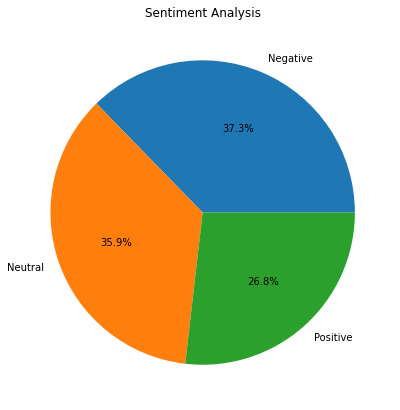

In [546]:
plt.figure(figsize=(15,7))
plt.title("Sentiment Analysis")
plt.pie(df_dr.values, labels = df_dr .index,autopct='%1.1f%%')

In [547]:
#Tokenization
df['Comment']= df['Comment'].apply(lambda x: x.split())
df.Comment.head(5)

0    [rescue, mission, nigerian, government, regard...
1    [get, someone, help, u, delete, administration...
2    [old, man, shot, jaremaybe, suffering, hunger,...
3    [buhari, understands, constitutional, order, m...
4    [nigerian, pleading, galant, solder, something...
Name: Comment, dtype: object

In [548]:
dictionary = corpora.Dictionary(df['Comment'])

In [549]:
 # Convert list of comment into a Document Term Matrix using the dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(rev) for rev in df['Comment']]

In [550]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

In [551]:
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=10, 
                random_state=100,
                chunksize=1000,
                passes=50)

In [552]:
lda_model.print_topics()

[(0,
  '0.044*"nigeria" + 0.023*"people" + 0.018*"government" + 0.015*"dey" + 0.012*"order" + 0.012*"need" + 0.011*"mali" + 0.010*"like" + 0.010*"constitutional" + 0.010*"see"'),
 (1,
  '0.030*"nigerian" + 0.022*"government" + 0.022*"nigeria" + 0.017*"country" + 0.015*"leader" + 0.015*"like" + 0.013*"fg" + 0.012*"must" + 0.012*"know" + 0.010*"go"'),
 (2,
  '0.074*"nigeria" + 0.064*"soon" + 0.061*"happen" + 0.018*"government" + 0.016*"coming" + 0.015*"wish" + 0.014*"dont" + 0.013*"coup" + 0.012*"country" + 0.011*"turn"'),
 (3,
  '0.028*"coup" + 0.020*"u" + 0.014*"mali" + 0.014*"nigerian" + 0.014*"1983" + 0.013*"buhari" + 0.013*"nigeria" + 0.012*"government" + 0.011*"military" + 0.011*"people"'),
 (4,
  '0.037*"go" + 0.025*"coup" + 0.019*"government" + 0.018*"next" + 0.015*"mali" + 0.012*"dey" + 0.011*"nigeria" + 0.011*"una" + 0.010*"condemn" + 0.010*"citizen"'),
 (5,
  '0.070*"nigeria" + 0.038*"mali" + 0.012*"problem" + 0.012*"need" + 0.012*"coup" + 0.011*"country" + 0.011*"one" + 0.011

In [553]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix)) # a measure of how good the model is. lower the


Perplexity:  -7.234576654600257


In [556]:
id2word = dictionary 
from gensim.models.coherencemodel import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['Comment'], dictionary=id2word , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3362494668618769


In [557]:
# Visualize the topics
import pyLDAvis.sklearn
pyLDAvis.enable_notebook(local=True)
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
saved = pyLDAvis.save_html(vis, fileobj = "vis_new.html")